# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [23]:
### Import Packages
import imp
import ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(6)

In [24]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ./Data/


## Train Unsupervised Models

### KMeans

In [25]:
### Unsupervised Learning - Raw
from Models import KMeansModel

# K-Means
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 2), model_name='KMeans', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([2942,  801, 2743, ..., 8974, 3574, 8952])},
 {'KMeans': array([3004, 4836, 7549, ..., 5461, 6494, 2449])}]

### Autoencoder

In [26]:
# Autoencoder 
from sklearn.model_selection import train_test_split
from Models import AutoEncoder
imp.reload(AutoEncoder)

# Add model and prep data
ml_quic.add_model(AutoEncoder.AutoEncoder(NDIM=ml_quic.get_num_timesteps_raw()), model_name='AE', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['AE'], train_type=1);

### Train and Compare Unsupervised Models

In [27]:
ml_quic.train_models(tags=['Unsupervised'])

In [28]:
ml_quic.get_model_scores(tags=['Unsupervised']);

KMeans:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7991
         pos       0.93      0.47      0.62      1273

    accuracy                           0.92      9264
   macro avg       0.93      0.73      0.79      9264
weighted avg       0.92      0.92      0.91      9264

286/286 [==============================] - 1s 2ms/step
AE:
              precision    recall  f1-score   support

         neg       0.96      0.99      0.97      7991
         pos       0.88      0.73      0.80      1146

    accuracy                           0.95      9137
   macro avg       0.92      0.86      0.89      9137
weighted avg       0.95      0.95      0.95      9137



286/286 [==============================] - 1s 2ms/step


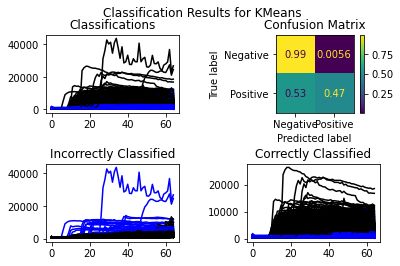

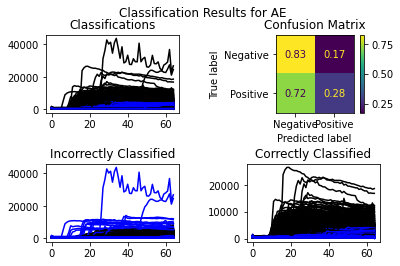

In [29]:
ml_quic.get_model_plots(tags=['Unsupervised'])

## Supervised

### Multilayer Perceptron

In [30]:
from Models import MLP
imp.reload(MLP)

# Get positive samples to train on 
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), 'mlp', tag='Supervised')

In [31]:
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])
ml_quic.get_model_scores(tags = ['Supervised'])

29/29 [==============================] - 0s 1ms/step
mlp:
              precision    recall  f1-score   support

         neg       1.00      0.95      0.97       794
         pos       0.76      0.99      0.86       132

    accuracy                           0.95       926
   macro avg       0.88      0.97      0.92       926
weighted avg       0.96      0.95      0.96       926



{'mlp': '              precision    recall  f1-score   support\n\n         neg       1.00      0.95      0.97       794\n         pos       0.76      0.99      0.86       132\n\n    accuracy                           0.95       926\n   macro avg       0.88      0.97      0.92       926\nweighted avg       0.96      0.95      0.96       926\n'}

In [32]:
ml_quic.get_model_plots(tags=['Supervised'])

29/29 [==============================] - 0s 1ms/step
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\kyleh\AppData\Local\Temp\ipykernel_25956\109963020.py", line 1, in <cell line: 1>
    ml_quic.get_model_plots(tags=['Supervised'])
  File "f:\High Speed Code Storage\RTQuicCode\BetterBePaperWorthy\ML_QuIC.py", line 333, in get_model_plots
    ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, ax=ax[0, 1], normalize='true', display_labels=['Negative', 'Positive'])
UnboundLocalError: local variable 'ax' referenced before assignment

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\kyleh\ana